# Explore the dataset

In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and inspect

In [2]:
df = pd.read_csv('../02-data/case-demand-prediction-nytt-data.csv')
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 64992 rows and 10 columns.


In [3]:
# display the first 5 rows
df.head()

,tstamp,consumed_heat,temp,cloud,day_of_week,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed
0,01/01/2012 00:00,21.441080,-8.8,13.0,Sunday,1.0,1.0,1.0,0.0,0.0
1,01/01/2012 01:00,21.636080,-8.5,13.0,Sunday,1.0,1.0,1.0,0.0,0.0
2,01/01/2012 02:00,21.195580,-8.8,13.0,Sunday,1.0,1.0,1.0,130.0,1.0
3,01/01/2012 03:00,20.775913,-8.2,13.0,Sunday,1.0,1.0,1.0,130.0,1.0
4,01/01/2012 04:00,20.453913,-6.7,13.0,Sunday,1.0,1.0,1.0,110.0,1.0


In [4]:
df.describe()

,consumed_heat,temp,cloud,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed
count,64992.000000,64707.000000,64707.000000,64707.000000,64707.000000,64707.000000,64641.000000,64641.000000
mean,12.467902,7.443280,66.268800,0.292642,0.287079,0.033752,183.086973,3.107347
std,6.916366,8.105937,31.589701,0.454979,0.452402,0.180592,103.109906,1.858784
min,1.266000,-19.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.700000,1.300000,38.000000,0.000000,0.000000,0.000000,110.000000,2.000000
50%,12.494000,6.900000,75.000000,0.000000,0.000000,0.000000,200.000000,3.000000
75%,18.112000,13.700000,98.000000,1.000000,1.000000,0.000000,260.000000,4.000000
max,52.095764,31.400000,113.000000,1.000000,1.000000,1.000000,360.000000,12.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64992 entries, 0 to 64991
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tstamp                 64992 non-null  object 
 1   consumed_heat          64992 non-null  float64
 2   temp                   64707 non-null  float64
 3   cloud                  64707 non-null  float64
 4   day_of_week            64707 non-null  object 
 5   holiday_in_general     64707 non-null  float64
 6   school_holiday_period  64707 non-null  float64
 7   public_holiday_period  64707 non-null  float64
 8   wind_direction         64641 non-null  float64
 9   wind_speed             64641 non-null  float64
dtypes: float64(8), object(2)
memory usage: 5.0+ MB


Data types of each column

In [6]:
df.dtypes

tstamp                    object
consumed_heat            float64
temp                     float64
cloud                    float64
day_of_week               object
holiday_in_general       float64
school_holiday_period    float64
public_holiday_period    float64
wind_direction           float64
wind_speed               float64
dtype: object

Parse date to datetime

In [7]:
df['tstamp'] = pd.to_datetime(df['tstamp'], format='%d/%m/%Y %H:%M') #01/01/2012 00:00

In [8]:
# get time range
print(f"The time range is: {df["tstamp"].min()} - {df["tstamp"].max()}")

The time range is: 2012-01-01 00:00:00 - 2019-05-31 23:00:00


In [9]:
# check if there are missing timestamps
missing = pd.date_range(start=df['tstamp'].min(), end=df['tstamp'].max(), freq='h').difference(df['tstamp'])
print(f"There are {len(missing)} time stamps missing.")

There are 0 time stamps missing.


## Handle missing values 

In [10]:
df.isnull().sum()

tstamp                     0
consumed_heat              0
temp                     285
cloud                    285
day_of_week              285
holiday_in_general       285
school_holiday_period    285
public_holiday_period    285
wind_direction           351
wind_speed               351
dtype: int64

### Decide on how to handle missing values.

In [11]:
columns_with_nans = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
df = df.dropna(subset=columns_with_nans)

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

# Basic plots

In [13]:
df = df.set_index("tstamp")

In [14]:
df.head()

,consumed_heat,temp,cloud,day_of_week,holiday_in_general,school_holiday_period,public_holiday_period,wind_direction,wind_speed
tstamp,,,,,,,,,
2012-01-01 00:00:00,21.441080,-8.8,13.0,Sunday,1.0,1.0,1.0,0.0,0.0
2012-01-01 01:00:00,21.636080,-8.5,13.0,Sunday,1.0,1.0,1.0,0.0,0.0
2012-01-01 02:00:00,21.195580,-8.8,13.0,Sunday,1.0,1.0,1.0,130.0,1.0
2012-01-01 03:00:00,20.775913,-8.2,13.0,Sunday,1.0,1.0,1.0,130.0,1.0
2012-01-01 04:00:00,20.453913,-6.7,13.0,Sunday,1.0,1.0,1.0,110.0,1.0


### Consumed heat and temperature over time

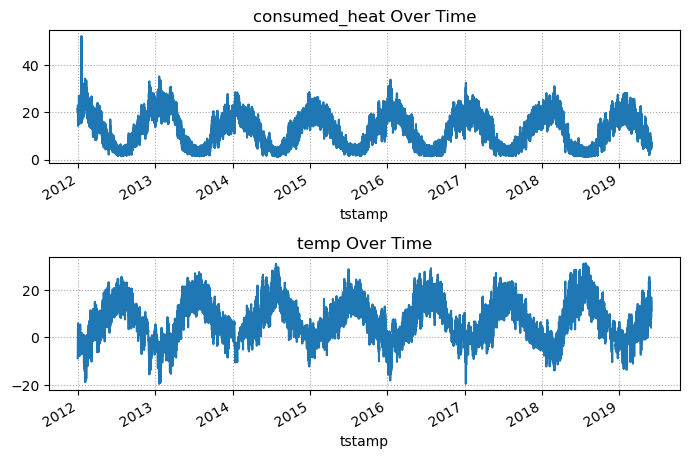

In [15]:
# plot consumed head over a time
plt.figure(figsize=(7, 20))
#numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plot_cols = ["consumed_heat", "temp"]#, "cloud", "wind_speed", "wind_direction"]

for i,col in enumerate(plot_cols):
    plt.subplot(len(df.columns), 1, i+1)
    df[col].plot(title=f'{col} Over Time')
    plt.grid(ls=':', alpha=0.7, c='gray')
plt.tight_layout()
plt.show()

### Cloud cover, wind speed and wind direction

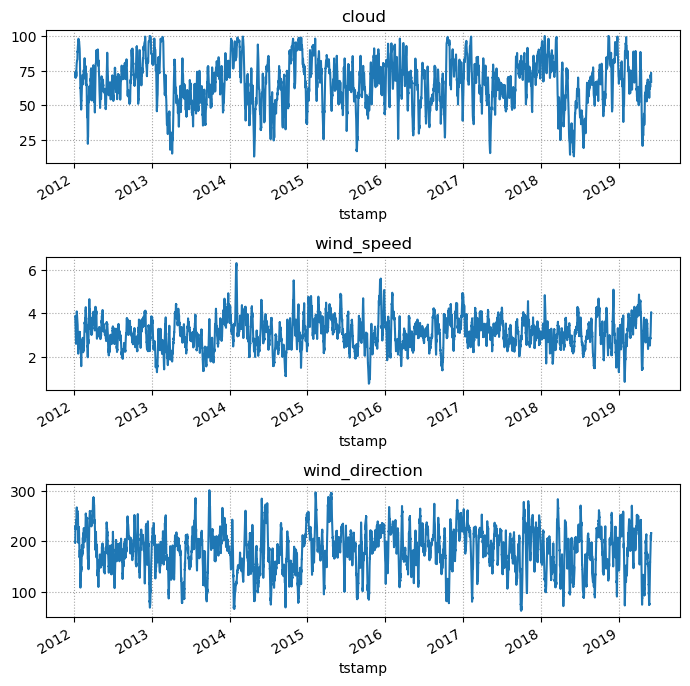

In [16]:
plt.figure(figsize=(7, 20))
plot_cols = ["cloud", "wind_speed", "wind_direction"]
week_hr = 7*24

for i,col in enumerate(plot_cols):
    plt.subplot(len(df.columns), 1, i+1)
    rolling_mean = df[col].rolling(week_hr).mean()
    rolling_std = df[col].rolling(week_hr).std()
    rolling_mean.plot(title=f'{col}')
    plt.grid(ls=':', alpha=0.7, c='gray')
plt.tight_layout()
plt.show()

### Rolling mean of consumed heat

(15340.0, 18047.958333333332)

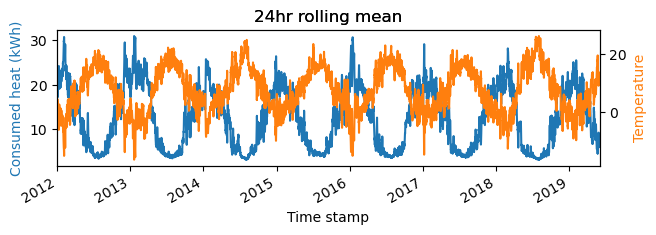

In [23]:
df['rolling_mean_24h'] = df['consumed_heat'].rolling(24).mean()
df['temp_rolling_mean_24h'] = df['temp'].rolling(24).mean()

# plot
f, ax = plt.subplots(1,1, figsize=(7,2))
ax2 = ax.twinx()
df["rolling_mean_24h"].plot(title='24hr rolling mean', ax=ax, color="C0", label='consumed heat')
df["temp_rolling_mean_24h"].plot(title='24hr rolling mean', ax=ax2, color="C1", label='temperature')
ax.set_ylabel("Consumed heat (kWh)", color="C0")
ax2.set_ylabel("Temperature", color="C1")
ax.set_xlabel("Time stamp")
ax.set_xlim(df.index.min(), df.index.max())

Distribution of the target, another way of seeing the previous plot.

In [24]:
df.columns

Index(['consumed_heat', 'temp', 'cloud', 'day_of_week', 'holiday_in_general',
       'school_holiday_period', 'public_holiday_period', 'wind_direction',
       'wind_speed', 'rolling_mean_24h', 'temp_rolling_mean_24h'],
      dtype='object')

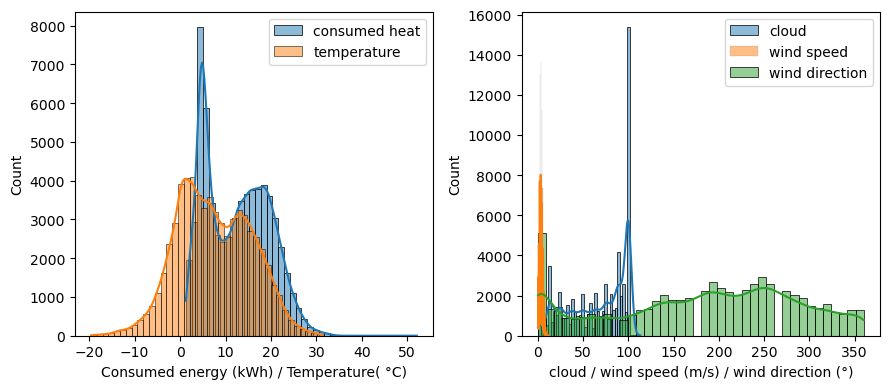

In [25]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4))
sns.histplot(data=df, x="consumed_heat", kde=True, bins=40, ax=ax1, color='tab:blue', label='consumed heat')
sns.histplot(data=df, x="temp", kde=True, bins=40, ax=ax1, color='tab:orange', label='temperature')

sns.histplot(data=df, x="cloud", kde=True, bins=40, ax=ax2, color='tab:blue', label='cloud')
sns.histplot(data=df, x="wind_speed", kde=True, bins=40, ax=ax2, color='tab:orange', label='wind speed')
sns.histplot(data=df, x="wind_direction", kde=True, bins=40, ax=ax2, color='tab:green', label='wind direction')
ax1.legend()
ax2.legend()
ax1.set_xlabel("Consumed energy (kWh) / Temperature( °C)")
ax2.set_xlabel("cloud / wind speed (m/s) / wind direction (°)")
plt.tight_layout()


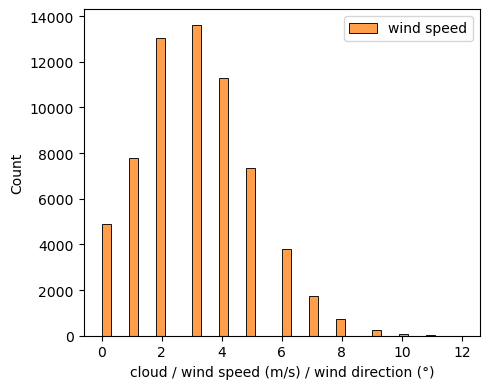

In [26]:
f, ax2 = plt.subplots(1,1,figsize=(5,4))
sns.histplot(data=df, x="wind_speed", bins=40, ax=ax2, color='tab:orange', label='wind speed')
ax2.legend()
ax2.set_xlabel("cloud / wind speed (m/s) / wind direction (°)")
plt.tight_layout()


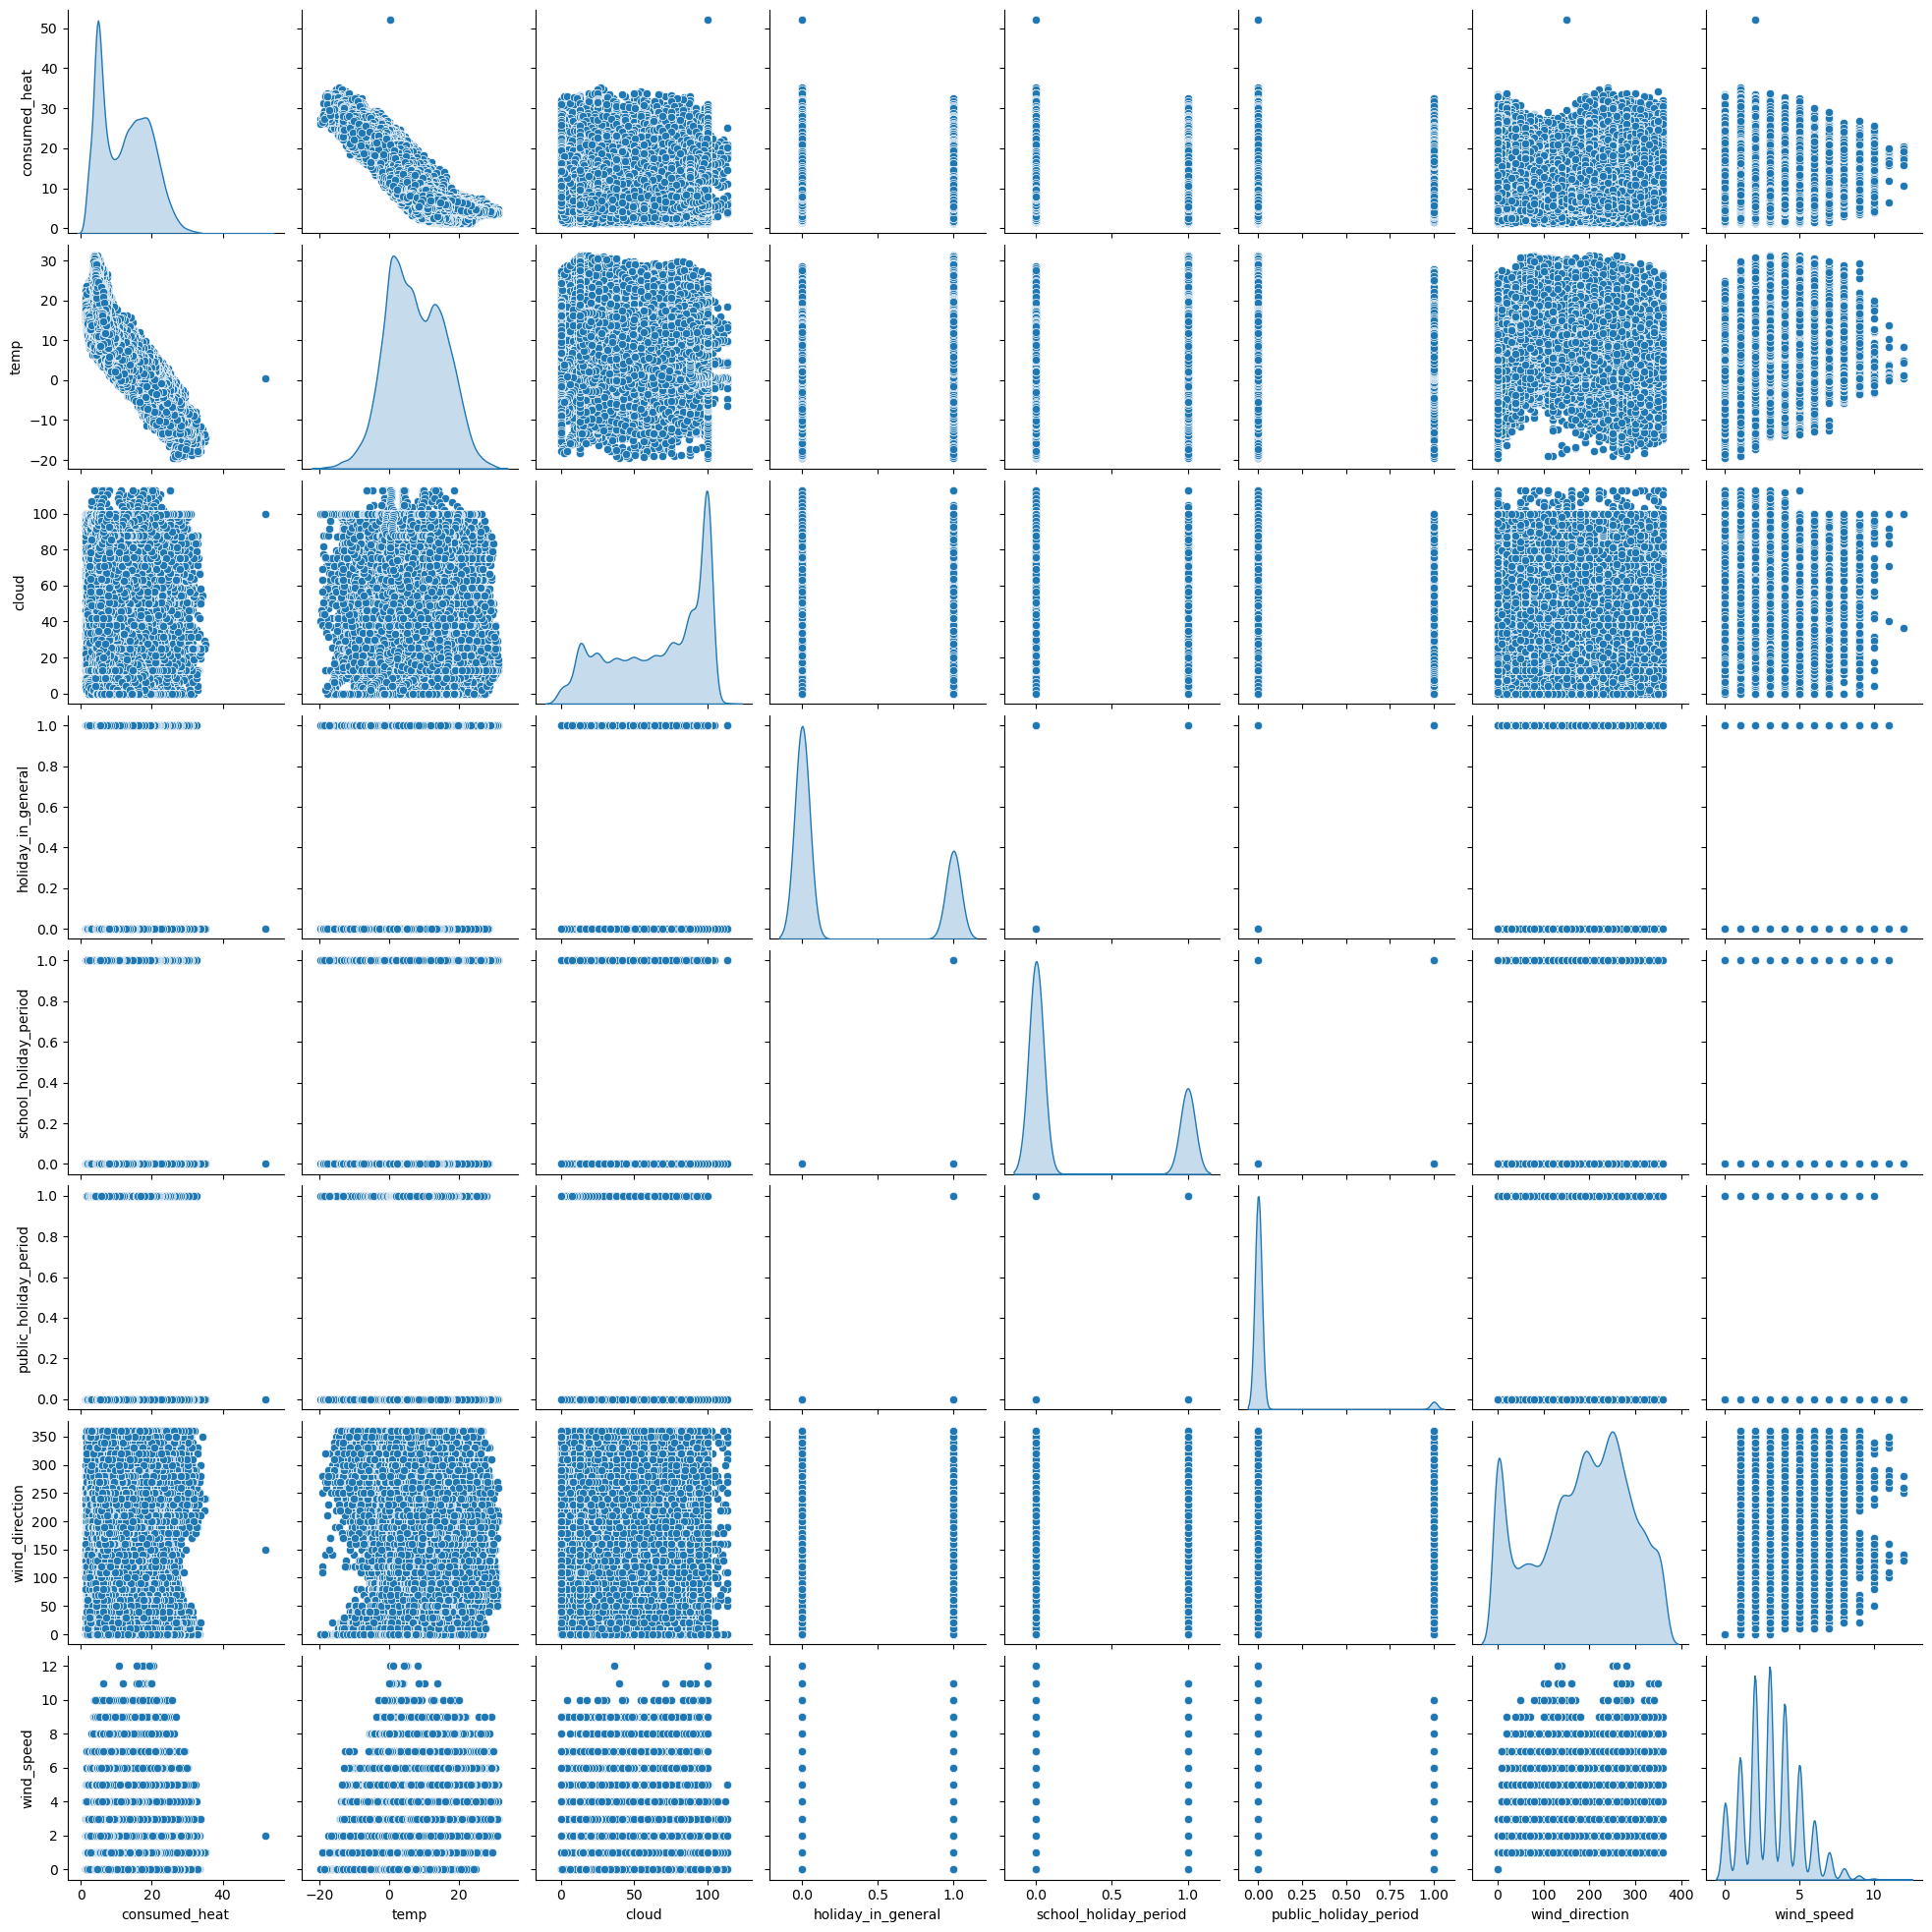

In [40]:
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()
check_corre = [col for col in numerical_cols if col not in ['rolling_mean_24h','temp_rolling_mean_24h']]
sns.pairplot(df, vars=check_corre, diag_kind="kde")

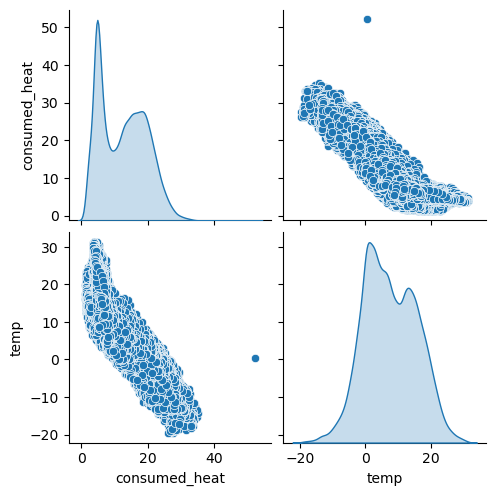

In [45]:
sns.pairplot(df, vars=['consumed_heat', 'temp'], diag_kind="kde")

In [41]:
len(check_corre)

8

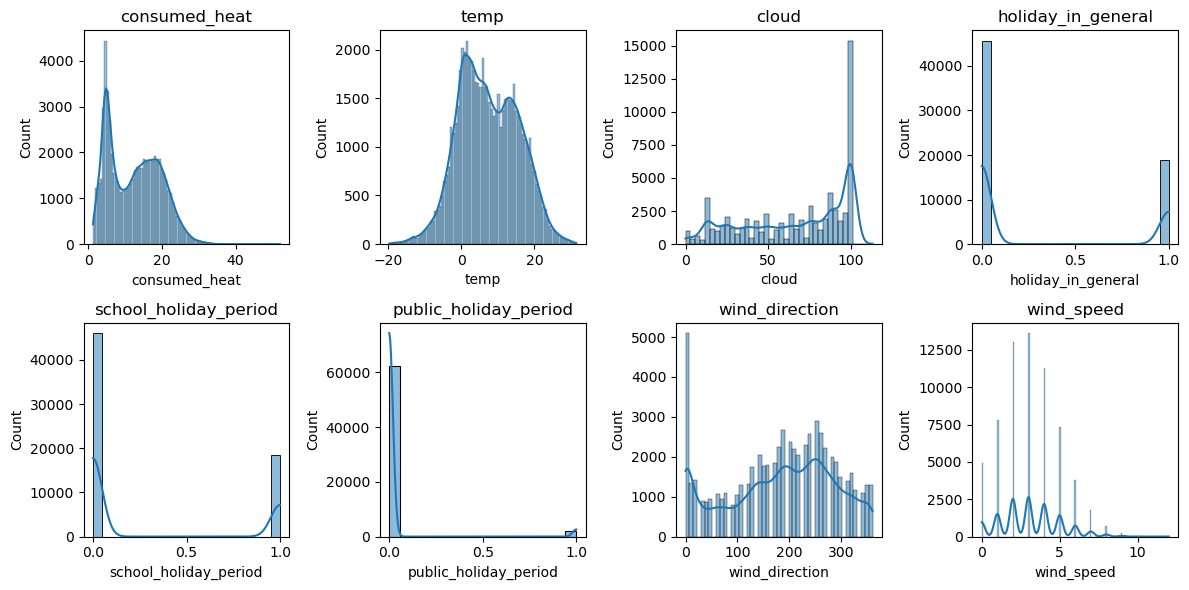

In [42]:
f, axes = plt.subplots(2, 4, figsize=(12,6))
flat_axes = axes.flatten()

for i,col in enumerate(check_corre):
    ax = flat_axes[i]
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()

## Seasonal trends

In [43]:
hour_avg = df.groupby(df.index.hour).consumed_heat.mean()
day_avg = df.groupby(df.index.day).consumed_heat.mean()
month_avg = df.groupby(df.index.month).consumed_heat.mean()
year_avg = df.groupby(df.index.year).consumed_heat.mean()


Text(0.5, 0, 'year')

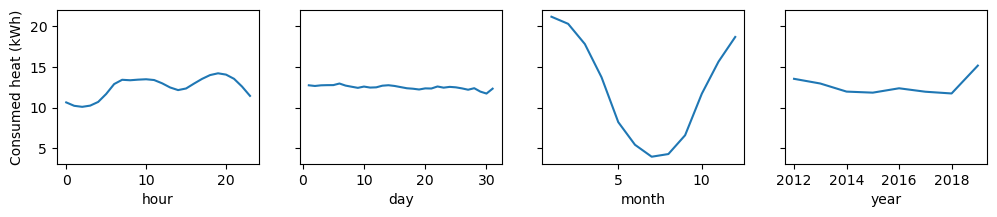

In [44]:
f, ax = plt.subplots(1, 4, figsize=(12,2), sharey=True)
hour_avg.plot(ax=ax[0])
day_avg.plot(ax=ax[1])
month_avg.plot(ax=ax[2])
year_avg.plot(ax=ax[3])
ax[0].set_ylabel("Consumed heat (kWh)")
ax[0].set_xlabel("hour")
ax[1].set_xlabel("day")
ax[2].set_xlabel("month")
ax[3].set_xlabel("year")

- It makes sense that there is more variability during the hours of the day and the overall month, and not during the days in a month and over year. 
- Expected that the peaks are during winter time.

## Insept consumption during holidays

In [111]:
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

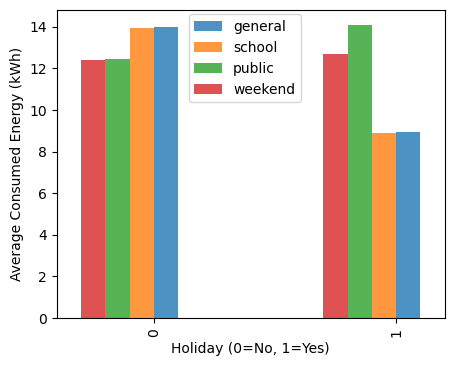

In [ ]:
gen_holiday_avg = df.groupby("holiday_in_general").consumed_heat.mean()
school_holiday_avg = df.groupby("school_holiday_period").consumed_heat.mean()
public_holiday_avg = df.groupby("public_holiday_period").consumed_heat.mean()
weekend_avg = df.groupby('is_weekend').consumed_heat.mean()

f, ax = plt.subplots(1, 1, figsize=(5, 4))

gen_holiday_avg.plot(kind='bar', ax=ax, position=0, width=0.1, color='C0', alpha=0.8, label='general')
school_holiday_avg.plot(kind='bar', ax=ax, position=1, width=0.1, color='C1', alpha=0.8, label='school')
public_holiday_avg.plot(kind='bar', ax=ax, position=2, width=0.1, color='C2', alpha=0.8, label='public')
weekend_avg.plot(kind='bar', ax=ax, position=3, width=0.1, color='C3', alpha=0.8, label='weekend')

ax.set_xlabel('Holiday (0=No, 1=Yes)')
ax.set_ylabel('Average Consumed Energy (kWh)')
ax.legend(loc=[.34,0.7]) 
ax.set_xlim(-0.4,1.2)
plt.show()

**Observations:**
- we don't expect major differences between weekend and not weekend
- during public holidays there is slighlt more consumption, meaning that ppl tend to stay at home and use energy, and shps/industries remain functioning.
- the opporite is true for public and school holidays: the consumption is lower during these days, meaning that ppl tend to not stay at home and shops/industries are closed and not consuming much. 

### Rolling average of wind direction

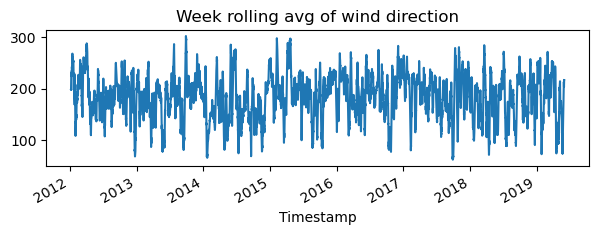

In [19]:
df['daily_rolling_avg'] = df["wind_direction"].rolling(week_hr).mean().plot(
    figsize=(7, 2), title='Week rolling avg of wind direction', xlabel='Timestamp')

## Correlations

<Axes: >

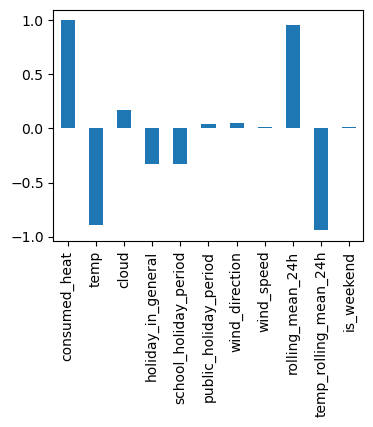

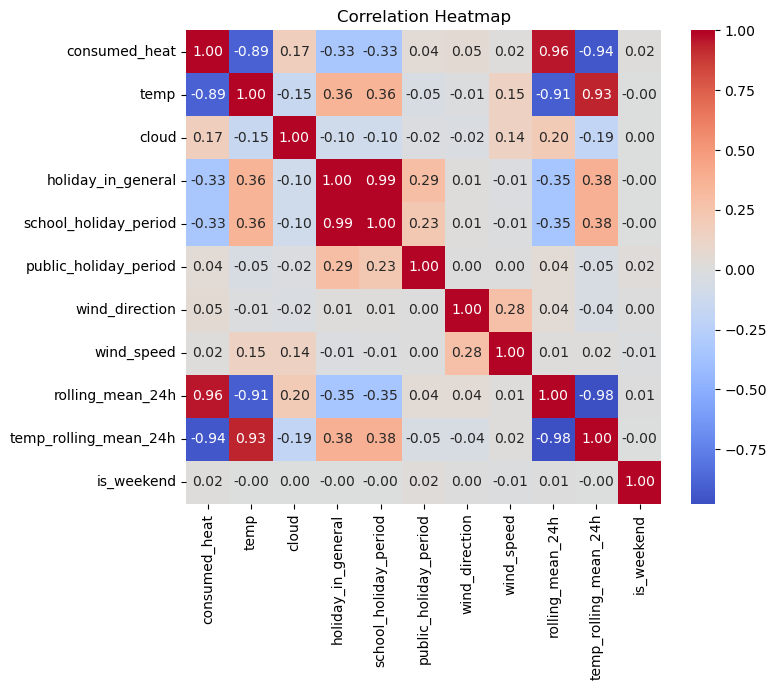

In [129]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()

- Temperature is the most correalted to consumed heat.
- When there is holiday (school or general) there seem to be less consumption.

# Things to check
- Check outliers or flat periods
- check how much gener and school holidays differ between each other